In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [6]:
def poly_regression(x, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    return model, y_pred, r2

In [4]:
x = np.linspace(-1, 1, 100)

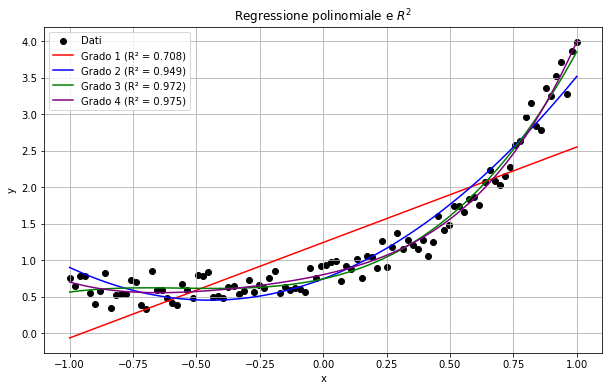

In [ ]:
y = 0
for i in range(0, 5):
    y += x**i * np.random.uniform(0.6, 1, size=x.shape)

degrees = [1, 2, 3, 4]
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dati')

for deg, col in zip(degrees, colors):
    model, y_pred, r2 = poly_regression(x, y, deg)
    plt.plot(x, y_pred, color=col, label=f"Grado {deg} (R² = {r2:.3f})")

plt.title("Regressione polinomiale e $R^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def exp_model(x, a, b, c):
    return a * np.exp(b * x) + c

def log_model(x, a, b, c):
    return a * np.log(b * x) + c

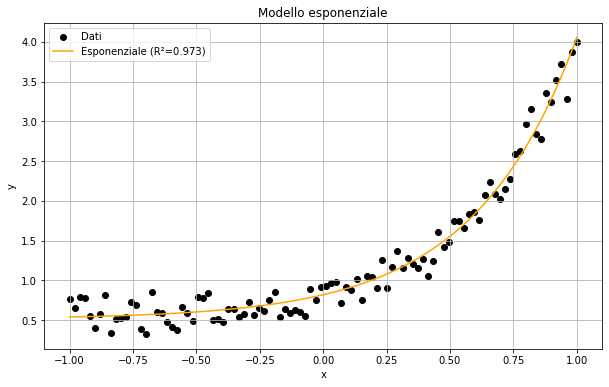

In [10]:
try:
    popt_exp, _ = curve_fit(exp_model, x, y, maxfev=10000)
    y_exp = exp_model(x, *popt_exp)
    r2_exp = r2_score(y, y_exp)
except:
    y_exp = np.zeros_like(y)
    r2_exp = float('-inf')

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dati')
plt.plot(x, y_exp, color='orange', label=f'Esponenziale (R²={r2_exp:.3f})')
plt.legend()
plt.grid(True)
plt.title("Modello esponenziale")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

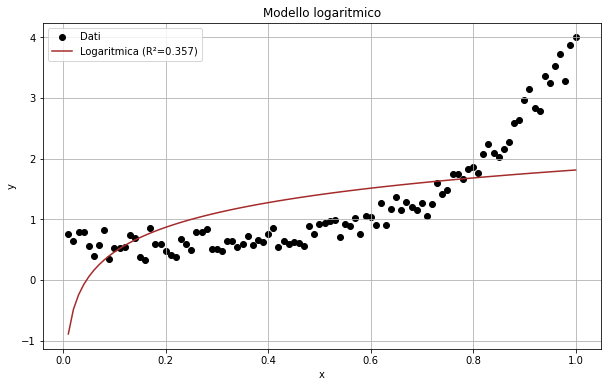

In [30]:
x = np.linspace(0.01, 1, 100)  # Avoid log(0)

# 5. Fit logaritmico
try:
    popt_log, _ = curve_fit(log_model, x, y, maxfev=10000)
    y_log = log_model(x, *popt_log)
    r2_log = r2_score(y, y_log)
except:
    y_log = np.zeros_like(y)
    r2_log = float('-inf')

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dati')
plt.plot(x, y_log, color='brown', label=f'Logaritmica (R²={r2_log:.3f})')
plt.legend()
plt.grid(True)
plt.title("Modello logaritmico")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

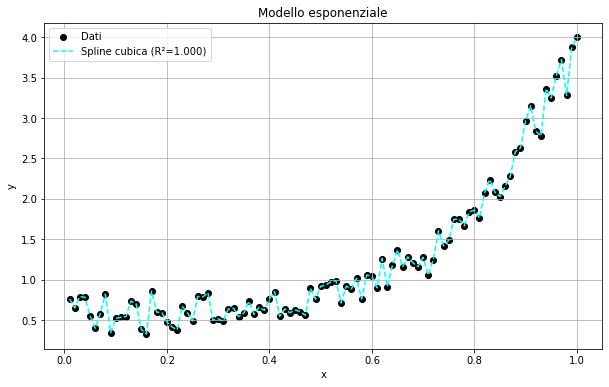

In [31]:
spline = CubicSpline(x, y)
y_spline = spline(x)
r2_spline = r2_score(y, y_spline)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dati')
plt.plot(x, y_spline, color='cyan', linestyle='--', label=f'Spline cubica (R²={r2_spline:.3f})')
plt.legend()
plt.grid(True)
plt.title("Modello esponenziale")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

At this point let's extend regressions and see how change the fit and the new best-fit regression.

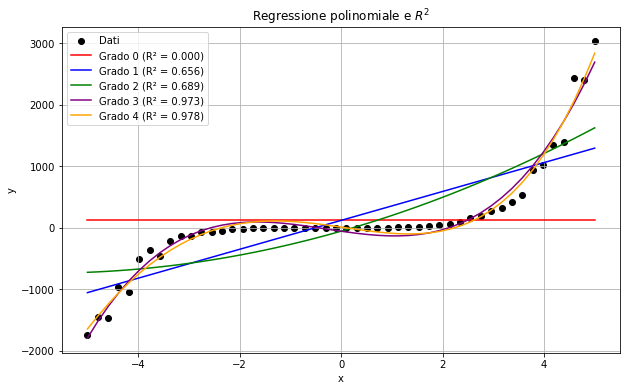

In [ ]:
x = np.linspace(-5, 5, 50)

y = 0
for i in range(5, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x.shape)
    y += x**i * coeff_i

degrees = [0, 1, 2, 3, 4]
colors = ['red', 'blue', 'green', 'purple', 'orange']

y_predictions = []

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dati')
for deg, col in zip(degrees, colors):
    model, y_pred, r2 = poly_regression(x, y, deg)
    plt.plot(x, y_pred, color=col, label=f"Grado {deg} (R² = {r2:.3f})")
    y_predictions.append((model, y_pred, r2))
plt.title("Regressione polinomiale e $R^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

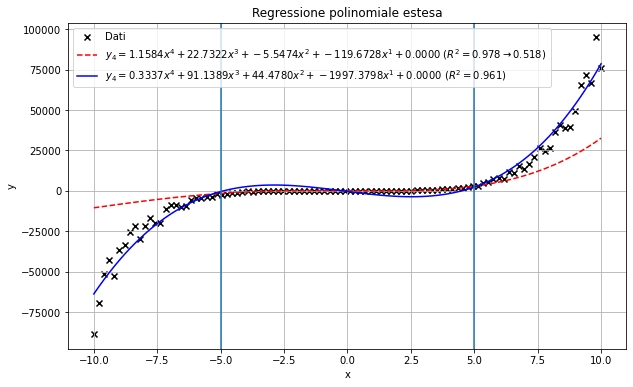

In [181]:
# extend regressions and see how change the fit and the new best-fit regression
x_extended = np.linspace(-10, 10, 100)
y_extended = 0
for i in range(5, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x_extended.shape)
    y_extended += x_extended**i * coeff_i

plt.figure(figsize=(10, 6))
plt.scatter(x_extended, y_extended, color='black', marker='x', label='Dati')

degrees = [4]
colors = ['red']
new_colors = ['blue']

for i, (deg, col) in enumerate(zip(degrees, colors)):
    model, y_pred, r2 = y_predictions[deg]
    y_str_deg = f'y_{deg} = ' + ' + '.join([f'{coeff:.4f}x^{i}' if i > 0 else f'{coeff:.4f}' for i, coeff in enumerate(model.coef_)][::-1])
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x_extended.reshape(-1, 1))
    y_pred = model.predict(X_poly)
    r2_extended = max(r2_score(y_extended, y_pred), 0)
    plt.plot(x_extended, y_pred, color=col, linestyle='--', label=f"${y_str_deg}$ ($R^2 = {r2:.3f} \\rightarrow {r2_extended:.3f}$)")
    new_model, new_y_pred, new_r2 = poly_regression(x_extended, y_extended, deg)
    new_y_str_deg = f'y_{deg} = ' + ' + '.join([f'{coeff:.4f}x^{i}' if i > 0 else f'{coeff:.4f}' for i, coeff in enumerate(new_model.coef_)][::-1])
    plt.plot(x_extended, new_y_pred, color=new_colors[i], label=f"${new_y_str_deg}$ ($R^2 = {new_r2:.3f}$)")
plt.axvline(-5)
plt.axvline(5)
plt.title("Regressione polinomiale estesa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Now let's change domain from $[-10, 10]$ to $[0, 10]$

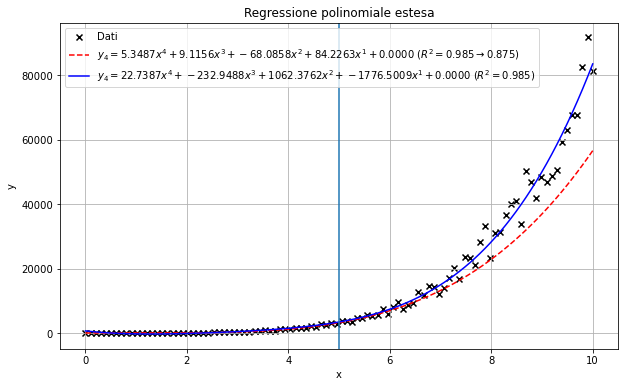

In [180]:
x = np.linspace(0, 5, 50)

y = 0
for i in range(5, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x.shape)
    y += x**i * coeff_i

degrees = [4]
colors = ['red']
new_colors = ['blue']

y_predictions_0_5 = None

for deg, col in zip(degrees, colors):
    model, y_pred, r2 = poly_regression(x, y, deg)
    y_predictions_0_5 = (model, y_pred, r2)


# extend regressions and see how change the fit and the new best-fit regression
x_extended = np.linspace(0, 10, 100)
y_extended = 0
for i in range(5, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x_extended.shape)
    y_extended += x_extended**i * coeff_i
y_extended[:50] = y

plt.figure(figsize=(10, 6))
plt.scatter(x_extended, y_extended, color='black', marker='x', label='Dati')

for i, (deg, col) in enumerate(zip(degrees, colors)):
    model, y_pred, r2 = y_predictions_0_5
    y_str_deg = f'y_{deg} = ' + ' + '.join([f'{coeff:.4f}x^{i}' if i > 0 else f'{coeff:.4f}' for i, coeff in enumerate(model.coef_)][::-1])
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x_extended.reshape(-1, 1))
    y_pred = model.predict(X_poly)
    r2_extended = max(r2_score(y_extended, y_pred), 0)
    plt.plot(x_extended, y_pred, color=col, linestyle='--', label=f"${y_str_deg}$ ($R^2 = {r2:.3f} \\rightarrow {r2_extended:.3f}$)")
    new_model, new_y_pred, new_r2 = poly_regression(x_extended, y_extended, deg)
    new_y_str_deg = f'y_{deg} = ' + ' + '.join([f'{coeff:.4f}x^{i}' if i > 0 else f'{coeff:.4f}' for i, coeff in enumerate(new_model.coef_)][::-1])
    plt.plot(x_extended, new_y_pred, color=new_colors[i], label=f"${new_y_str_deg}$ ($R^2 = {new_r2:.3f}$)")
plt.axvline(5)
plt.title("Regressione polinomiale estesa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

0.966144822052986
0.9630167340436534
0.9532405240608115
0.9458221361272281
0.929406941513714
0.9107522540893498


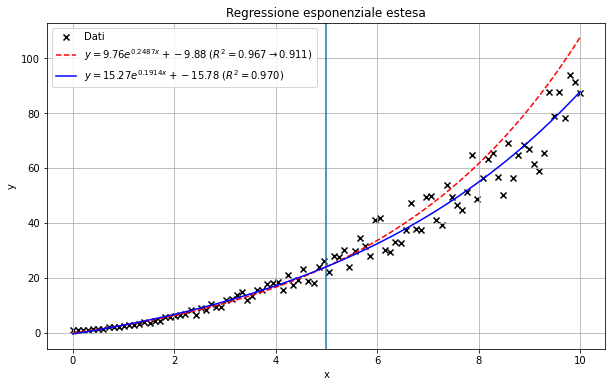

In [201]:
# extend exponential regressions and see how change the fit and the new best-fit regression
x = np.linspace(0, 5, 50)
y = 0
for i in range(2, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x.shape)
    y += x**i * coeff_i

x_extended = np.linspace(0, 10, 100)
y_extended = 0
for i in range(2, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x_extended.shape)
    y_extended += x_extended**i * coeff_i
y_extended[:50] = y

plt.figure(figsize=(10, 6))
plt.scatter(x_extended, y_extended, color='black', marker='x', label='Dati')

try:
    popt_exp, _ = curve_fit(exp_model, x, y, maxfev=10000)
    y_exp = exp_model(x, *popt_exp)
    y_exp_extended = exp_model(x_extended, *popt_exp)
    r2_exp = r2_score(y, y_exp)
    r2_exp_extended = max(r2_score(y_extended, y_exp_extended), 0)
except:
    print('Exception')

col = 'red'
new_col = 'blue'

a, b, c = popt_exp
y_str_exp = f'y = {a:.2f}e^' + '{' + f'{b:.4f}x' + '} + ' + f'{c:.2f}'

plt.axvline(5)
plt.plot(x_extended, y_exp_extended, color=col, linestyle='--', label=f'${y_str_exp}$ ($R^2={r2_exp:.3f} \\rightarrow {r2_exp_extended:.3f}$)')

try:
    new_popt_exp, _ = curve_fit(exp_model, x_extended, y_extended, maxfev=10000)
    new_y_exp = exp_model(x_extended, *new_popt_exp)
    new_r2_exp = r2_score(y_extended, new_y_exp)
except:
    print('Exception')

for x in range(5, 10+1):
    print(r2_score(y_extended[:10*x], y_exp_extended[:10*x]))

new_a, new_b, new_c = new_popt_exp
new_y_str_exp = f'y = {new_a:.2f}e^' + '{' + f'{new_b:.4f}x' + '} + ' + f'{new_c:.2f}'

# extend y_exp
plt.plot(x_extended, new_y_exp, color=new_col, label=f'${new_y_str_exp}$ ($R^2={new_r2_exp:.3f}$)')

plt.title("Regressione esponenziale estesa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Now it's SPLINE time!

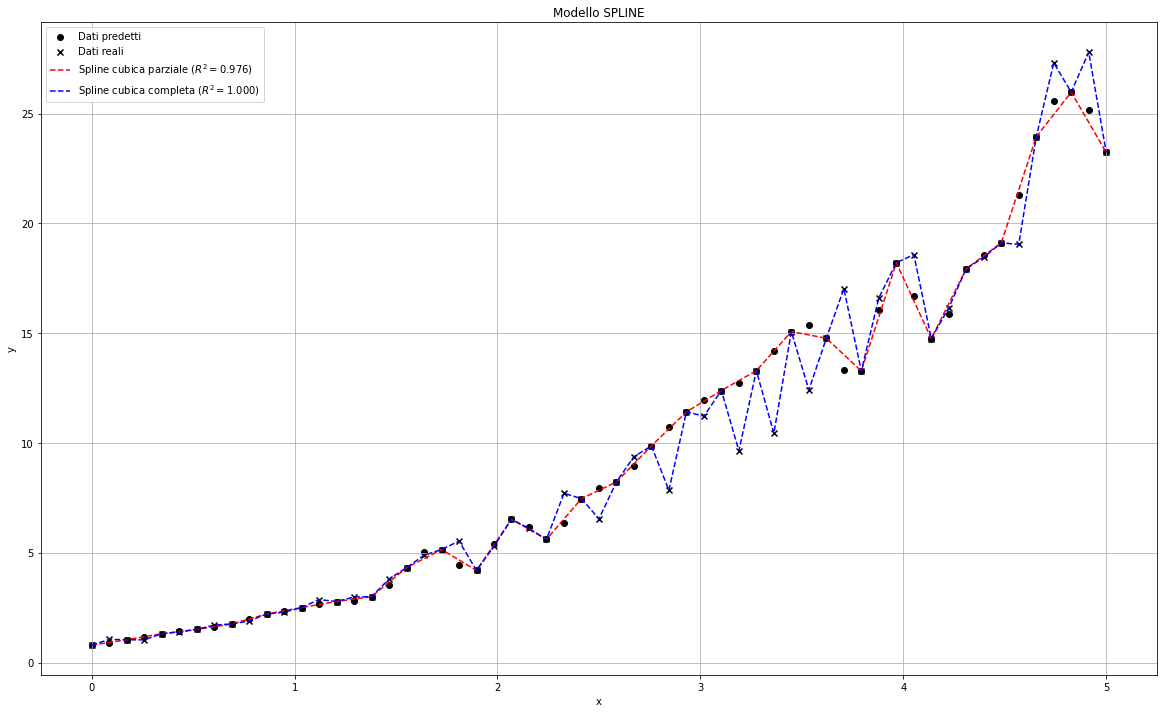

In [229]:
N_POINT = 30

x = np.linspace(0, 5, N_POINT)
y = 0
for i in range(2, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x.shape)
    y += x**i * coeff_i

x_extended = np.linspace(0, 5, N_POINT * 2 - 1)
y_extended = 0
for i in range(2, -1, -1):
    coeff_i = np.random.uniform(0.6, 1, size=x_extended.shape)
    y_extended += x_extended**i * coeff_i
y_extended[::2] = y

# ------------------------------------------------------------------------------------------

spline = CubicSpline(x, y)
y_spline = spline(x)
y_predicted = spline(x_extended)
r2_spline = r2_score(y_extended, y_predicted)

# use spline to predict y_extended
plt.figure(figsize=(20, 12))

spline_extended = CubicSpline(x_extended, y_extended)
y_spline_extended = spline_extended(x_extended)
r2_spline_extended = r2_score(y_extended, y_spline_extended)

col = 'red'
new_col = 'blue'

plt.scatter(x_extended, y_predicted, color='black', label='Dati predetti')
plt.scatter(x_extended, y_extended, color='black', marker='x', label='Dati reali')
plt.plot(x, y_spline, color=col, linestyle='--', label=f'Spline cubica parziale ($R^2 = {r2_spline:.3f}$)')
plt.plot(x_extended, y_spline_extended, color=new_col, linestyle='--', label=f'Spline cubica completa ($R^2={r2_spline_extended:.3f}$)')
plt.legend()
plt.grid(True)
plt.title("Modello SPLINE")
plt.xlabel("x")
plt.ylabel("y")
plt.show()